[Python for Data Science](#ds)

   - [NumPy](#Numpy)
    
   - [Matplotlib](#Matplotlib)
    
   - [Pandas](#Pandas)
       - [Data Frames](#data_frames)
       - [Reading and Writing CSV Files](#reading_writing_csv)
       - [Accessing Data](#accessing_data)
       - [Missing Data](#missing_data)
       - [Grouping Data](#grouping_data)
       - [Time Series: Days of Week](#time_series_days_of_week)

<a id='ds'></a>

In [97]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

# Numpy 
<a id='Numpy'></a>

## Timing performance

In [150]:
a = np.random.rand(1000, 1000)

# In jupyter notebooks we can do line by line profiling.
%timeit -n 100 b1 = a*a

100 loops, best of 3: 2 ms per loop


In [151]:
%timeit -t aa = np.dot(a,a)

10 loops, best of 3: 81.1 ms per loop


## Working with vectors

Avoid iteration over matrix elements.
If you have to use a for loop.

To enable vectorization:

    use vectorized functions
    use functionas from numpy
    
Vectorization : https://en.wikipedia.org/wiki/Array_programming

In [127]:
def stepf(x):
    """Scalar implementation of the Heaviside step function."""
    if x>=0.5:
        return 1
    else:
        return 0

normal_matrix = np.random.rand(3,3)
normal_matrix
    

array([[ 0.034738  ,  0.16321876,  0.02139324],
       [ 0.8389862 ,  0.57116877,  0.42917981],
       [ 0.9302277 ,  0.26325625,  0.05876737]])

In [128]:
# Vectorize the step function to work with arrays
V_stepf = np.vectorize(stepf)

# stepf(normal_matrix)
# ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
V_stepf(normal_matrix)

array([[0, 0, 0],
       [1, 1, 0],
       [1, 0, 0]])

In [129]:
# If you try to run stepf(normal_matrix) you will get an error message making mention of any() and all()
# Let's see how these work
(normal_matrix > 0.5).any()

True

In [130]:
(normal_matrix>0.5).all()

False

<a id='Matplotlib'></a>

# Matplotlib

In [131]:
#pl.ioff()
pl.ion()
pl.isinteractive()

True

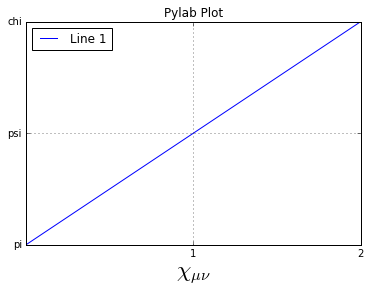

In [134]:
x = [1,2,3]
labels = ['pi', 'psi', 'chi']

pl.title('Pylab Plot')
pl.xlabel(r'$\chi_{\mu\nu}$', fontsize=23)
pl.xticks(np.arange(min(x), max(x)+1, 1.0))
pl.yticks(x, labels, rotation='horizontal')
pl.grid(True)
pl.plot(x, label='Line 1');
pl.legend(loc='best');

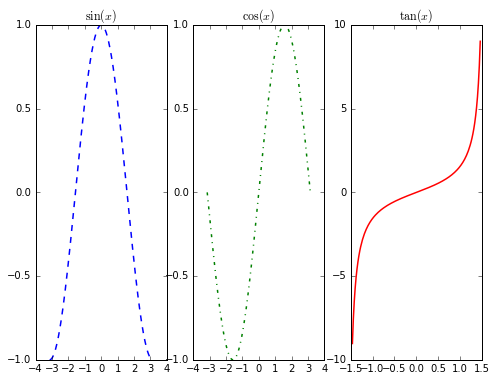

In [133]:
X = np.linspace(-np.pi, np.pi, 300, endpoint=True)
cosine, sine = np.cos(X), np.sin(X)

pl.figure(figsize=(8, 6), dpi=80)
pl.subplot(1, 3, 1)
pl.title(r'$\sin (x)$')
pl.plot(X, cosine, color='blue', linewidth=1.5, linestyle='--');
pl.subplot(1, 3, 2)
pl.title(r'$\cos (x)$')
pl.plot(X, sine, color='green', linewidth=1.5, linestyle='-.');
pl.subplot(1, 3, 3)
pl.title(r'$\tan (x)$')
pl.plot(X[80:220], sine[80:220]/cosine[80:220], color='red', linewidth=1.5, linestyle='-');

<a id='Pandas'></a>

## Pandas

<a id='data_frames'></a>

### Data Frames

In [149]:
ind = ['a', 'b', 'c', 'd', 'e']
mine = {'one': pd.Series(np.arange(0,5), index=ind),
       'two': pd.Series(np.arange(1,6), index=ind),
       'three': pd.Series(np.arange(2,7), index=ind)}

df = pd.DataFrame(mine)
df

,one,three,two
a,0,2,1
b,1,3,2
c,2,4,3
d,3,5,4
e,4,6,5


<a id='reading_writing_csv'></a>

### Reading and writing csv files

In [214]:
people = ['sid', 'pedro', 'david', 'leti', 'joel']
dob = [1999, 1995, 1990, 1985, 1980]

dataset = list(zip(people, dob))
df = pd.DataFrame(data = dataset, columns=['names','dob'])
df.to_csv('information.csv', index=False, header=False) # Ignore the warning (if it gives you one)

/usr/lib/python3/dist-packages/pandas/core/internals.py:552: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  values = values[:, slicer]
/usr/lib/python3/dist-packages/pandas/core/index.py:624: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = arr_idx[key]


In [215]:
#df = pd.read_csv('information.csv', header=None)
df = pd.read_csv('information.csv', names=['peoples', 'years'])
df

,peoples,years
0,sid,1999
1,pedro,1995
2,david,1990
3,leti,1985
4,joel,1980


<a id='accessing_data'></a>

### Accessing the data

In [216]:
df.head(3)

,peoples,years
0,sid,1999
1,pedro,1995
2,david,1990


In [217]:
df.tail(3)

,peoples,years
2,david,1990
3,leti,1985
4,joel,1980


One can get individual field in the following ways

In [218]:
df.columns

Index(['peoples', 'years'], dtype='object')

In [219]:
df.values

array([['sid', 1999],
       ['pedro', 1995],
       ['david', 1990],
       ['leti', 1985],
       ['joel', 1980]], dtype=object)

For those of you who like bash

In [220]:
df.peoples

0      sid
1    pedro
2    david
3     leti
4     joel
Name: peoples, dtype: object

In [230]:
df['years']

0    1999
1    1995
2    1990
3    1985
4    1980
Name: years, dtype: int64

In [231]:
df['years'].min()

1980

In [232]:
youngest = df['peoples'][df['years'] == df['years'].max()]
youngest

0    sid
Name: peoples, dtype: object

In [233]:
df['peoples'].describe()

count        5
unique       5
top       leti
freq         1
Name: peoples, dtype: object

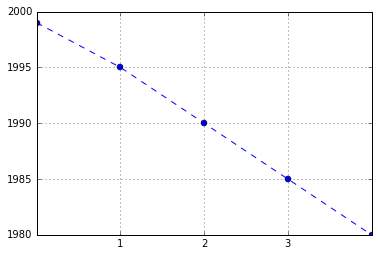

In [234]:
pl.xticks(np.arange(min(x), max(x)+1, 1.0))
df['years'].plot(linestyle='--', marker='o');

In [235]:
ss = [111, 222, 333, 444, 555]
df['ss'] = ss
df

,peoples,years,ss
0,sid,1999,111
1,pedro,1995,222
2,david,1990,333
3,leti,1985,444
4,joel,1980,555


In [236]:
df['ss'] = df['ss'] + 5
ind = ['a', 'b', 'c', 'd', 'e']
df.index = ind
df

,peoples,years,ss
a,sid,1999,116
b,pedro,1995,227
c,david,1990,338
d,leti,1985,449
e,joel,1980,560


In [239]:
df[['peoples','years']]

,peoples,years
a,sid,1999
b,pedro,1995
c,david,1990
d,leti,1985
e,joel,1980


In [243]:
# Using an index
df.loc['a']

peoples     sid
years      1999
ss          116
Name: a, dtype: object

In [244]:
# using the position as index
df.iloc[0]

peoples     sid
years      1999
ss          116
Name: a, dtype: object

In [245]:
# Most general. Supports index and position retrieval
df.ix[:3, ['peoples','years']]

,peoples,years
a,sid,1999
b,pedro,1995
c,david,1990


In [246]:
# get scalar value (fast version of loc)
df.at['a','peoples']

'sid'

In [247]:
# get scalar (fast version of iloc)
df.iat[0,0]

'sid'

<a id='missing_data'></a>

### Missing Data

In [252]:
ind = ['a', 'b', 'c', 'd', 'e']
mine = {'one': pd.Series(np.arange(0,5), index=ind),
       'two': pd.Series(np.arange(1,6), index=ind),
       'three': pd.Series(np.arange(2,7), index=ind)}

df = pd.DataFrame(mine)
df.iloc[0,0] = np.nan
df.iloc[1,1] = np.nan
df.iloc[2,2] = np.nan
df

,one,three,two
a,NaN,2,1
b,1,NaN,2
c,2,4,NaN
d,3,5,4
e,4,6,5


In [292]:
df.isnull()

,one,three,two
a,True,False,False
b,False,True,False
c,False,False,True
d,False,False,False
e,False,False,False


In [305]:
q1 = df.fillna(10)
q1

,one,three,two
a,10,2,1
b,1,10,2
c,2,4,10
d,3,5,4
e,4,6,5


In [306]:
q1 = q1.query('one >2')
q1

,one,three,two
a,10,2,1
d,3,5,4
e,4,6,5


In [307]:
q1.query('one > three')

,one,three,two
a,10,2,1


In [281]:
q1 = q1.apply(lambda x: x.max() - x.min())
q1

one      3
three    5
two      3
dtype: float64

In [309]:
q2 = df.fillna(1)
q2

,one,three,two
a,1,2,1
b,1,1,2
c,2,4,1
d,3,5,4
e,4,6,5


In [311]:
q2.applymap(np.sqrt)

,one,three,two
a,1.000000,1.414214,1.000000
b,1.000000,1.000000,1.414214
c,1.414214,2.000000,1.000000
d,1.732051,2.236068,2.000000
e,2.000000,2.449490,2.236068


In [312]:
q3 = pd.Series(np.arange(5), index=np.arange(5)[::-1])
q3

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [317]:
q3.isin([0,1])

4     True
3     True
2    False
1    False
0    False
dtype: bool

In [318]:
q3.where(q3>2)

4   NaN
3   NaN
2   NaN
1     3
0     4
dtype: float64

<a id='grouping_data'></a>

### Grouping Data

In [339]:
data = {'a':['fer', 'bos', 'fer', 'bos','fer', 'bos', 'fer', 'fer'],
       'b' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
       'c' : np.random.randn(8), 
       'd' : np.arange(8)}
df = pd.DataFrame(data)
df

,a,b,c,d
0,fer,one,0.347596,0
1,bos,one,-1.819644,1
2,fer,two,-0.128226,2
3,bos,three,1.360900,3
4,fer,two,0.619698,4
5,bos,two,0.098638,5
6,fer,one,1.091697,6
7,fer,three,1.093156,7


In [340]:
group1 = df.groupby('a')
# If you are in need of a speed up and don't care for the order
# do 'group1 = df.groupby('a', sort=False)'
group1.size()

a
bos    3
fer    5
dtype: int64

In [341]:
group2 = df.groupby(['a','b'])
group1.describe()

/usr/lib/python3/dist-packages/pandas/compat/scipy.py:68: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  score = values[idx]


c         d
a                            
bos count  3.000000  3.000000
    mean  -0.120035  3.000000
    std    1.601508  2.000000
    min   -1.819644  1.000000
    25%   -0.860503  2.000000
    50%    0.098638  3.000000
    75%    0.729769  4.000000
    max    1.360900  5.000000
fer count  5.000000  5.000000
    mean   0.604784  3.800000
    std    0.519438  2.863564
    min   -0.128226  0.000000
    25%    0.347596  2.000000
    50%    0.619698  4.000000
    75%    1.091697  6.000000
    max    1.093156  7.000000

[16 rows x 2 columns]

In [342]:
group2.count()

a  b  c  d
a   b                
bos one    1  1  1  1
    three  1  1  1  1
    two    1  1  1  1
fer one    2  2  2  2
    three  1  1  1  1
    two    2  2  2  2

[6 rows x 4 columns]

In [343]:
group1.first()

,b,c,d
a,,,
bos,one,-1.819644,1
fer,one,0.347596,0


In [344]:
L = list(group1)
L[0]

('bos',      a      b         c  d
 1  bos    one -1.819644  1
 3  bos  three  1.360900  3
 5  bos    two  0.098638  5
 
 [3 rows x 4 columns])

In [345]:
L[1]

('fer',      a      b         c  d
 0  fer    one  0.347596  0
 2  fer    two -0.128226  2
 4  fer    two  0.619698  4
 6  fer    one  1.091697  6
 7  fer  three  1.093156  7
 
 [5 rows x 4 columns])

In [346]:
group1.sum()

,c,d
a,,
bos,-0.360106,9
fer,3.023921,19


In [347]:
group2.aggregate(np.sum)

c  d
a   b                 
bos one   -1.819644  1
    three  1.360900  3
    two    0.098638  5
fer one    1.439294  6
    three  1.093156  7
    two    0.491471  6

[6 rows x 2 columns]

In [348]:
group2['c'].agg([np.sum, np.mean])

sum      mean
a   b                        
bos one   -1.819644 -1.819644
    three  1.360900  1.360900
    two    0.098638  0.098638
fer one    1.439294  0.719647
    three  1.093156  1.093156
    two    0.491471  0.245736

[6 rows x 2 columns]

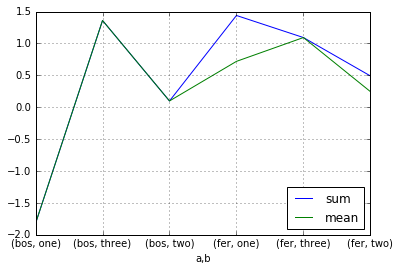

In [349]:
group2['c'].agg([np.sum, np.mean]).plot();

In [350]:
func = lambda x: 2*x
transform = group2.transform(func)
print(transform)

          c   d
0  0.695193   0
1 -3.639288   2
2 -0.256453   4
3  2.721799   6
4  1.239396   8
5  0.197276  10
6  2.183394  12
7  2.186313  14

[8 rows x 2 columns]


<a id='time_series_days_of_week'></a>

### Time Series: Days of the week

In [48]:
n=1000
df = pd.DataFrame(np.random.randn(n), pd.date_range('2010-01-01', periods=n), columns=["data"])
df['Dates'] = df.index
df['week_days'] =df.index.weekday
df

,data,Dates,week_days
2010-01-01,-0.473499,2010-01-01,4
2010-01-02,-0.323651,2010-01-02,5
2010-01-03,-0.091444,2010-01-03,6
2010-01-04,0.621451,2010-01-04,0
2010-01-05,0.760170,2010-01-05,1
2010-01-06,-1.003937,2010-01-06,2
2010-01-07,-0.398359,2010-01-07,3
2010-01-08,0.636049,2010-01-08,4
2010-01-09,-0.145835,2010-01-09,5
2010-01-10,1.764011,2010-01-10,6


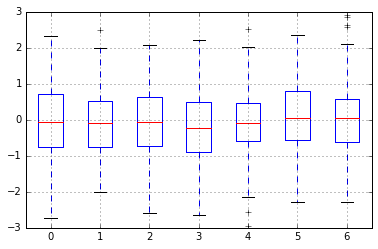

In [49]:
# Pivot the table df so that week-days are now columns 
x = df.pivot(index='Dates', columns='week_days', values='data')
x.boxplot();